# User Churn Prediction

This project is about a very common business problem: analyzing customer churn. In this project, using supervised learning models, you will identify cell phone service customers who are more likely to stop using the service in the future and create a model that can predict if a certain customer will drop the service. Furthermore, it would help to analyze the top factors that influence user retention to guide the company prevent user churn. The dataset contains the information of customers' plans and usage of the service, as well as whether or not they stopped using the service eventually.

Data Source:
https://drive.google.com/file/d/10viPq8FGkiYaUgAet8QW2RzV6YtLki1i/view?usp=share_link

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

**Load data into pandas dataframe**

In [2]:
df=pd.read_excel('D:\MACHINE LEARNING\Capstone Project 2\churn.xlsx')
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exploratory data analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   o

In [4]:
df.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                  object
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                           object
dtype: object

# Identifying missing values

In [5]:
df.isnull().any().sum()

1

In [6]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                1
number_customer_service_calls    0
churned                          0
dtype: int64

# Identifying duplicates

In [7]:
df.duplicated().any().sum()

0

# Identifying categorical and numeric columns

In [8]:
unique_values = df.nunique()

unique_values

state                              51
account_length                    218
area_code                           3
phone_number                     5000
intl_plan                           2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1660
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churned                             2
dtype: int64

In [9]:
categorical_variables = unique_values[unique_values<=10].index.tolist()
categorical_variables

['area_code',
 'intl_plan',
 'voice_mail_plan',
 'number_customer_service_calls',
 'churned']

In [10]:
binary_variables = unique_values[unique_values==2].index.tolist()
binary_variables

['intl_plan', 'voice_mail_plan', 'churned']

In [11]:
numeric_variables = unique_values[unique_values>10].index.tolist()
numeric_variables

['state',
 'account_length',
 'phone_number',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge']

# Statistical description and data range

In [12]:
df.describe(include='all')

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
count,5000,5000.00000,5000.000000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,5000
unique,51,NaN,NaN,5000,2,2,NaN,NaN,NaN,NaN,...,NaN,1660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,15.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False.
freq,158,NaN,NaN,1,4527,3677,NaN,NaN,NaN,NaN,...,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4293
mean,NaN,100.25860,436.911400,NaN,NaN,NaN,7.755200,180.288900,100.029400,30.649668,...,100.191000,NaN,200.391620,99.919200,9.017732,10.261780,4.435200,2.771146,1.570400,NaN
std,NaN,39.69456,42.209182,NaN,NaN,NaN,13.546393,53.894699,19.831197,9.162069,...,19.826496,NaN,50.527789,19.958686,2.273763,2.761396,2.456788,0.745580,1.306363,NaN
min,NaN,1.00000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.00000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,NaN,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.00000,415.000000,NaN,NaN,NaN,0.000000,180.100000,100.000000,30.620000,...,100.000000,NaN,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.00000,415.000000,NaN,NaN,NaN,17.000000,216.200000,113.000000,36.750000,...,114.000000,NaN,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,NaN


# Data cleaning

**Convert feature column ('total_eve_charge') into object type**

In [13]:
df['total_eve_charge']=df['total_eve_charge'].astype('str') 

In [14]:
df['total_eve_charge']

0       16.78
1           ?
2        10.3
3        5.26
4       12.61
        ...  
4995    18.96
4996    21.83
4997    14.69
4998    14.59
4999     22.7
Name: total_eve_charge, Length: 5000, dtype: object

**Detecting any ambiguous value ('?')**

In [15]:
from numpy import unique
unique(df['total_eve_charge'])

array(['0', '1.9', '10', ..., '9.94', '9.95', '?'], dtype=object)

In [16]:
df[df['total_eve_charge']=='?']['total_eve_charge']

1     ?
5     ?
20    ?
34    ?
50    ?
Name: total_eve_charge, dtype: object

**Replacing the ambiguous value ('?') with NaN value**

In [17]:
df.replace({'?':np.nan},inplace=True)

In [18]:
df['total_eve_charge'].isnull().sum()

5

In [19]:
df['total_intl_charge'].isnull().sum()

1

In [20]:
df[df['total_intl_charge'].isnull()] 

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,NaN,0,False.


In [21]:
df[df['total_eve_charge'].isnull()]

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,NaN,254.4,103,11.45,13.7,3,3.70,1,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,NaN,203.9,118,9.18,6.3,6,1.70,0,False.
20,FL,147,415,396-5800,no,no,0,155.1,117,26.37,...,93,NaN,208.8,133,9.40,10.6,4,2.86,0,False.
34,OK,57,408,395-2854,no,yes,25,176.8,94,30.06,...,75,NaN,213.5,116,9.61,8.3,4,2.24,0,False.
50,IA,52,408,413-4957,no,no,0,191.9,108,32.62,...,96,NaN,236.8,87,10.66,7.8,5,2.11,3,False.


**Changing the feature column ('total_eve_charge') back to numerical**

In [22]:
df['total_eve_charge']=df['total_eve_charge'].apply(pd.to_numeric)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               4995 non-null   f

**Drop any row having atleast one NaN value**

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4994 non-null   object 
 1   account_length                 4994 non-null   int64  
 2   area_code                      4994 non-null   int64  
 3   phone_number                   4994 non-null   object 
 4   intl_plan                      4994 non-null   object 
 5   voice_mail_plan                4994 non-null   object 
 6   number_vmail_messages          4994 non-null   int64  
 7   total_day_minutes              4994 non-null   float64
 8   total_day_calls                4994 non-null   int64  
 9   total_day_charge               4994 non-null   float64
 10  total_eve_minutes              4994 non-null   float64
 11  total_eve_calls                4994 non-null   int64  
 12  total_eve_charge               4994 non-null   f

- Calculate the total_net_minutes to reduce the number of features; do the same with calls, and charge
- Drop all repeated features and useless columns such as state, area_code and phone_number

In [26]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

In [27]:
df.drop(columns=['state','area_code','phone_number','total_day_charge', 'total_eve_charge','total_night_charge','total_day_calls','total_eve_calls', 
                 'total_night_calls', 'total_day_minutes','total_eve_minutes', 'total_night_minutes'], inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4994 non-null   int64  
 1   intl_plan                      4994 non-null   object 
 2   voice_mail_plan                4994 non-null   object 
 3   number_vmail_messages          4994 non-null   int64  
 4   total_intl_minutes             4994 non-null   float64
 5   total_intl_calls               4994 non-null   int64  
 6   total_intl_charge              4994 non-null   float64
 7   number_customer_service_calls  4994 non-null   int64  
 8   churned                        4994 non-null   object 
 9   total_net_minutes              4994 non-null   float64
 10  total_net_calls                4994 non-null   int64  
 11  total_net_charge               4994 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage:

Reseting the index

In [29]:
df = df.reset_index(drop=True)

In [30]:
df

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_net_minutes,total_net_calls,total_net_charge
0,128,no,yes,25,10.0,3,2.70,1,False.,707.2,300,72.86
1,137,no,no,0,12.2,5,3.29,0,False.,527.2,328,59.00
2,84,yes,no,0,6.6,7,1.78,2,False.,558.2,248,65.02
3,75,yes,no,0,10.1,3,2.73,3,False.,501.9,356,49.36
4,121,no,yes,24,7.5,7,2.03,3,False.,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...,...,...
4989,50,no,yes,40,9.9,5,2.67,2,False.,756.2,369,72.42
4990,152,no,no,0,14.7,2,3.97,3,True.,654.6,276,62.75
4991,61,no,no,0,13.6,4,3.67,1,False.,525.8,314,48.15
4992,109,no,no,0,8.5,6,2.30,0,False.,584.9,248,56.79


Convert all yes, no strings into ints such as in columns (intl_plan and voice_mail_plan)

In [31]:
df['intl_plan'] = np.where(df['intl_plan'].str.contains('yes'), 1, 0)
df['voice_mail_plan'] = np.where(df['voice_mail_plan'].str.contains('yes'), 1, 0)
df['churned'] = np.where(df['churned'].str.contains('True.'), 0, 1)

In [32]:
df

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_net_minutes,total_net_calls,total_net_charge
0,128,0,1,25,10.0,3,2.70,1,1,707.2,300,72.86
1,137,0,0,0,12.2,5,3.29,0,1,527.2,328,59.00
2,84,1,0,0,6.6,7,1.78,2,1,558.2,248,65.02
3,75,1,0,0,10.1,3,2.73,3,1,501.9,356,49.36
4,121,0,1,24,7.5,7,2.03,3,1,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...,...,...
4989,50,0,1,40,9.9,5,2.67,2,1,756.2,369,72.42
4990,152,0,0,0,14.7,2,3.97,3,0,654.6,276,62.75
4991,61,0,0,0,13.6,4,3.67,1,1,525.8,314,48.15
4992,109,0,0,0,8.5,6,2.30,0,1,584.9,248,56.79


# Data visualization

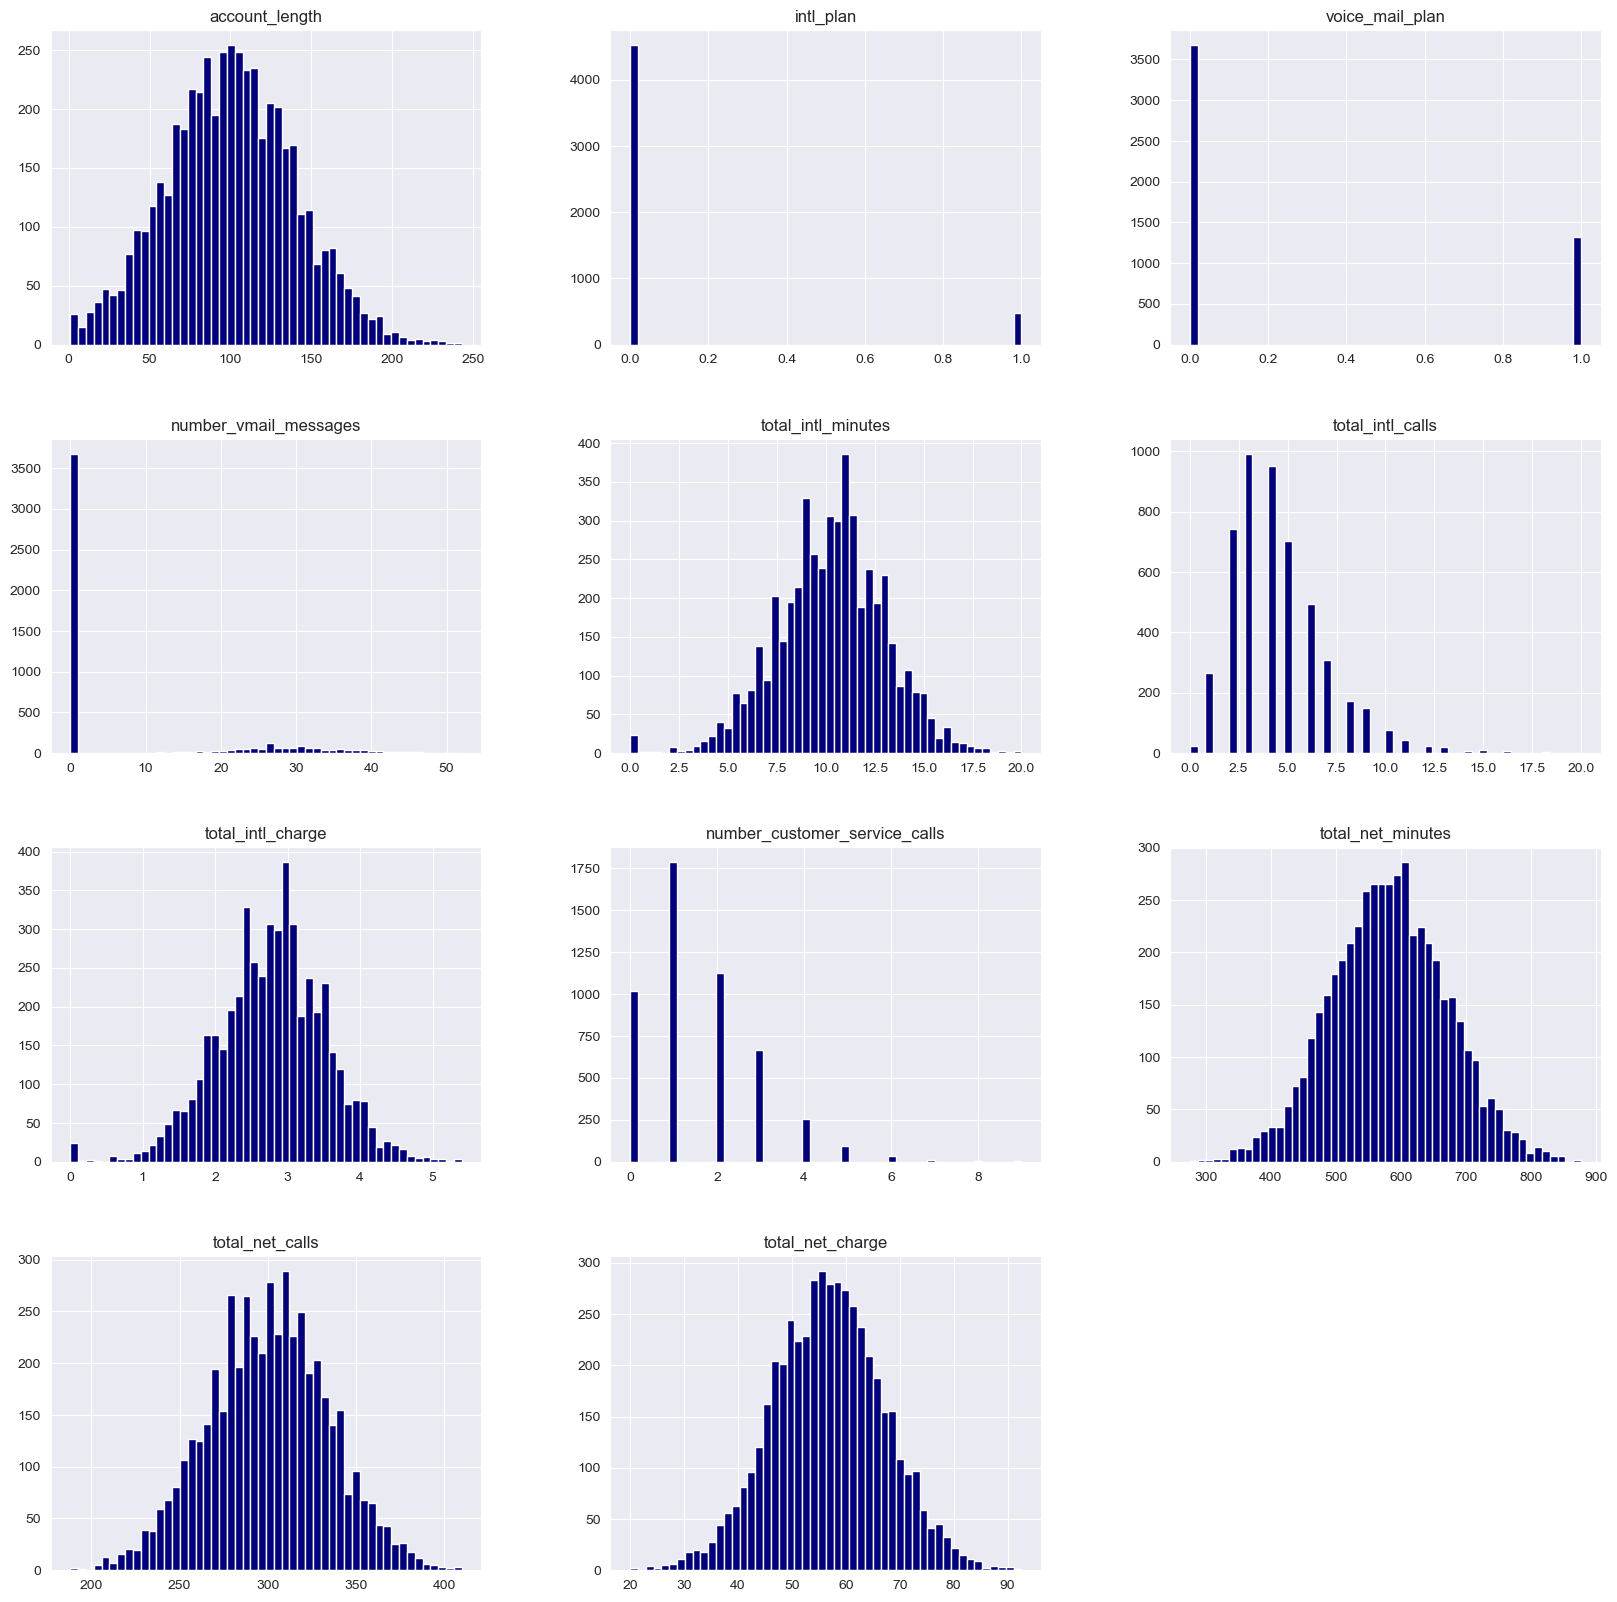

In [33]:
import seaborn as sns
sns.set_style('dark')
temp = df[['account_length', 'intl_plan', 'voice_mail_plan','number_vmail_messages', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls','total_net_minutes', 'total_net_calls', 'total_net_charge' ]]
temp.hist(bins=50,figsize=(20,20),color='navy');

# Check the output distribution and data balancement

In [34]:
df['churned'].value_counts(normalize=True)

1    0.85843
0    0.14157
Name: churned, dtype: float64

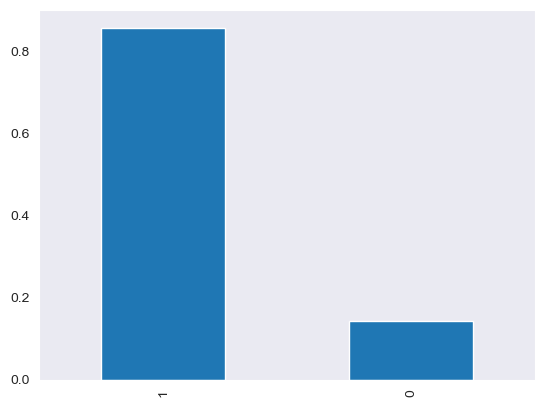

In [35]:
df['churned'].value_counts(normalize=True).plot(kind='bar')
plt.show()

# Correlations

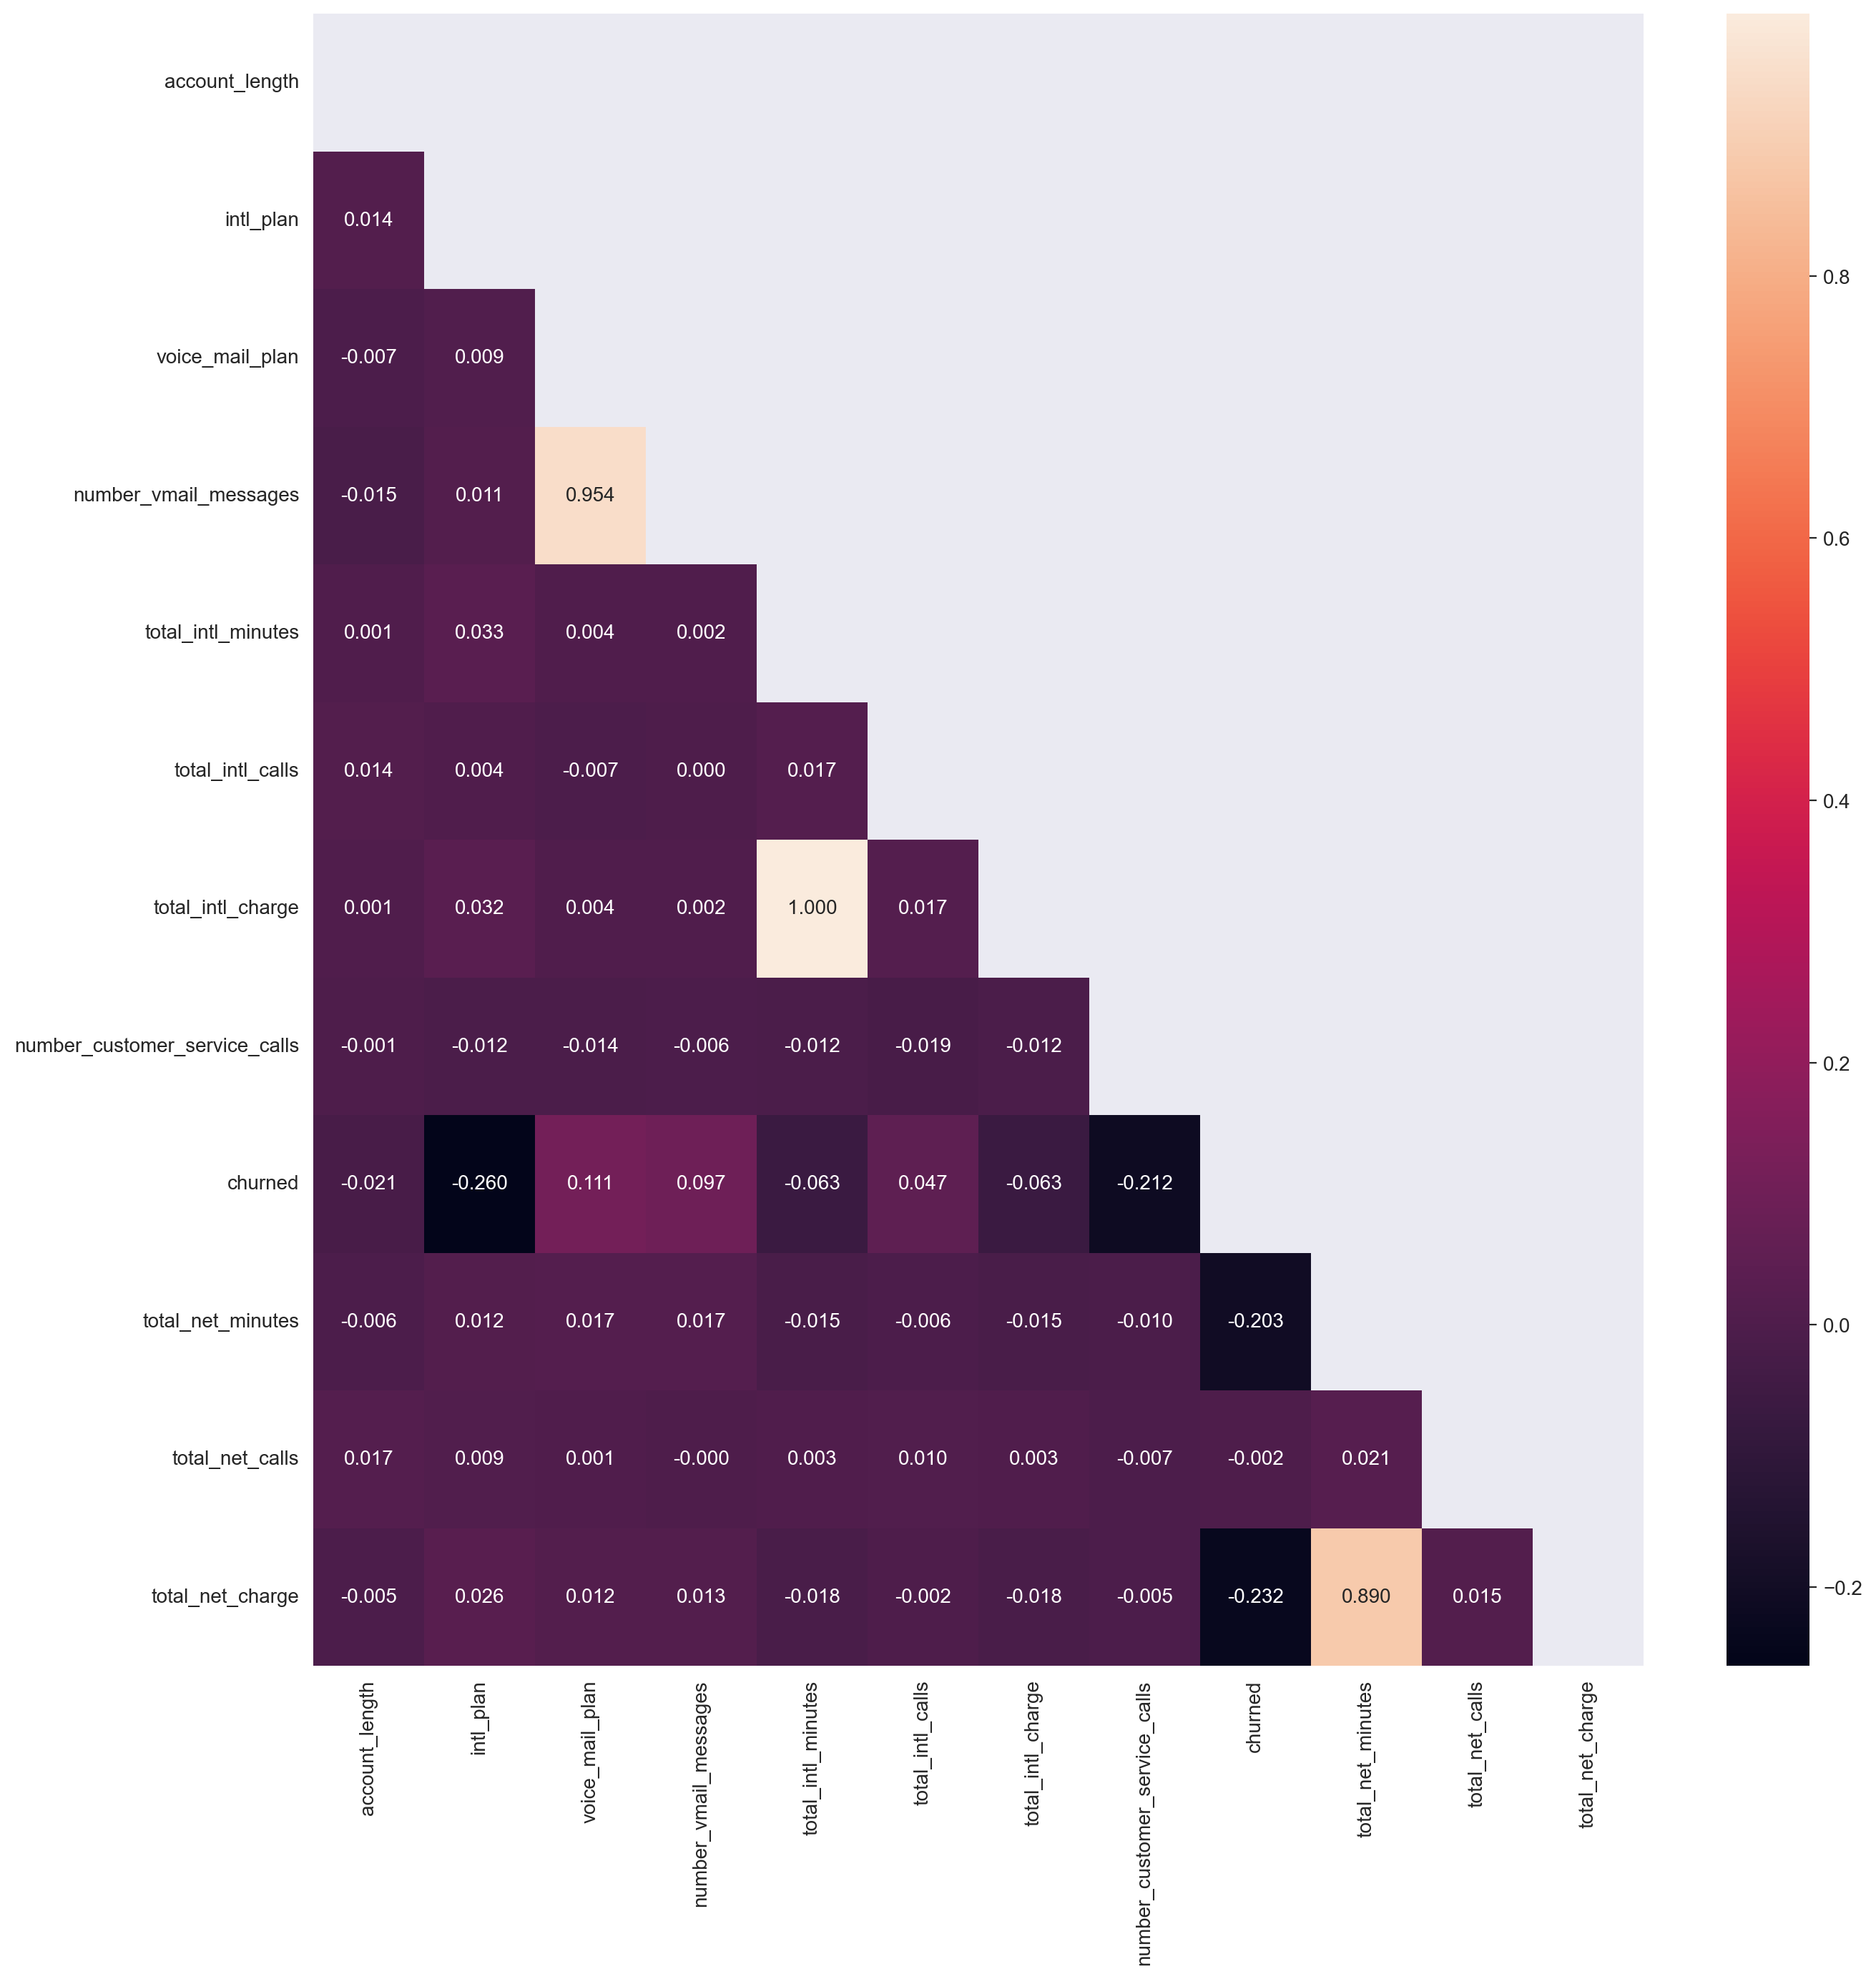

In [36]:
plt.figure(figsize=(15,15),dpi=200)
sns.heatmap(df.corr(),annot=True,fmt='.3f', mask=np.triu(df.corr()));

In [37]:
df.corr()['churned']

account_length                  -0.021259
intl_plan                       -0.260055
voice_mail_plan                  0.110553
number_vmail_messages            0.097483
total_intl_minutes              -0.063215
total_intl_calls                 0.046889
total_intl_charge               -0.063205
number_customer_service_calls   -0.212400
churned                          1.000000
total_net_minutes               -0.202887
total_net_calls                 -0.001767
total_net_charge                -0.231654
Name: churned, dtype: float64

**spliting the data**
- Use sklearn to split the data
- Split the dataframe into X, y
- Use train-test-spilt function to split the data
- Use random state to have same data each time you run the program
- Use stratify to cut the data with the same portion

In [38]:
X=df.drop('churned',axis=1)
y=df['churned']

In [39]:
# from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101,stratify=y)

In [40]:
# X_train.shape,y_train.shape

**Scaling the data**

In [41]:
scaler = RobustScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**First Model: Logistic Regression**

In [42]:
# from sklearn.utils.class_weight import compute_class_weight
# class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)

# # Compare the values
# print(f'The weights for the majority class is {class_weights[0]*2:.3f}')
# print(f'The weights for the minority class is {class_weights[1]*2:.3f}')

In [43]:
# from sklearn.metrics import fbeta_score, make_scorer
# ftwo_scorer = make_scorer(fbeta_score, beta=0.5)

In [44]:
from sklearn.linear_model import LogisticRegressionCV
logreg=LogisticRegressionCV(solver='liblinear',cv=10,class_weight='balanced')

In [45]:
logreg.fit(X_train_scaled,y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, solver='liblinear')

In [46]:
logreg.fit(X_train_scaled,y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, solver='liblinear')

In [47]:
logreg.coef_

array([[-0.0903637 , -2.44317734,  2.50721604, -0.79922125,  6.97025805,
         0.20706982, -7.28078404, -0.63261243, -0.12776095,  0.03221615,
        -1.00185859]])

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [49]:
y_pred = logreg.predict(X_test_scaled)

In [50]:
confusion_matrix(y_test,y_pred)

array([[126,  51],
       [222, 850]], dtype=int64)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


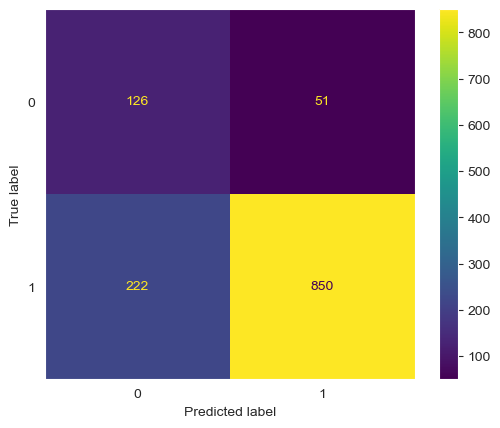

In [51]:
plot_confusion_matrix(logreg,X_test_scaled,y_test);

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.71      0.48       177
           1       0.94      0.79      0.86      1072

    accuracy                           0.78      1249
   macro avg       0.65      0.75      0.67      1249
weighted avg       0.86      0.78      0.81      1249



In [53]:
lr_ac=logreg.score(X_test_scaled,y_test)
lr_ac

0.7814251401120896

In [54]:
lr_prob=logreg.predict_proba(X_test_scaled)

In [55]:
from sklearn import metrics
def TP_rate_visualization(y_test, lr_prob):
  precision, recall, thresholds = metrics.precision_recall_curve(y_test, lr_prob[:,1])
  FPR, TPR, thresholds = metrics.roc_curve(y_test, lr_prob[:,1])
  AUC = metrics.auc(FPR, TPR)
  AP = metrics.auc(recall, precision)
    
  

  plt.figure(figsize=(10,5))

  plt.subplot(1,2,1)
  plt.plot(FPR, TPR)
  plt.title('roc Curve')
  plt.title(f'AUC = {AUC: .3f}')
  plt.ylabel('True positive rate') # TP/(TP+FN)
  plt.xlabel('False positive rate') # FP/(FP+TN)

  plt.subplot(1,2,2)
  plt.plot(recall, precision)
  plt.title(f'AP = {AP: .3f}')
  plt.ylabel('Precision')
  plt.xlabel('Recall')

  plt.show()

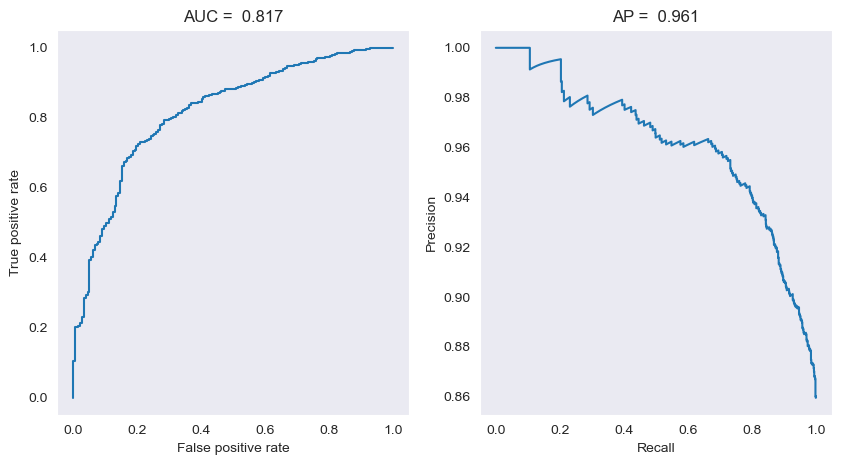

In [56]:
TP_rate_visualization(y_test, lr_prob)

In [57]:
FPR, TPR, thresholds = metrics.roc_curve(y_test, lr_prob[:,1])
frame={'FPR':FPR,'TPR':TPR,'thresholds':thresholds}
df=pd.DataFrame(frame)
df.head()

,FPR,TPR,thresholds
0,0.00000,0.000000,1.994291
1,0.00000,0.000933,0.994291
2,0.00000,0.106343,0.935821
3,0.00565,0.106343,0.934568
4,0.00565,0.203358,0.890152


In [58]:
lr_predict_class = [1 if prob > 0.1 else 0 for prob in lr_prob[:,1]]

In [59]:
confusion_matrix(y_test,lr_predict_class)

array([[  23,  154],
       [  10, 1062]], dtype=int64)

In [60]:
print(classification_report(y_test,lr_predict_class))

              precision    recall  f1-score   support

           0       0.70      0.13      0.22       177
           1       0.87      0.99      0.93      1072

    accuracy                           0.87      1249
   macro avg       0.79      0.56      0.57      1249
weighted avg       0.85      0.87      0.83      1249



In [61]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, lr_prob[:,1])
precision=precision.tolist()
precision.pop()
recall=recall.tolist()
recall.pop()

0.0

In [62]:
frame={'Precision':precision,'Recall':recall,'Thresholds':thresholds}
df=pd.DataFrame(frame)
df

,Precision,Recall,Thresholds
0,0.859663,1.000000,0.019940
1,0.859551,0.999067,0.022081
2,0.860241,0.999067,0.023747
3,0.860129,0.998134,0.026004
4,0.860821,0.998134,0.036655
...,...,...,...
1242,1.000000,0.004664,0.988785
1243,1.000000,0.003731,0.989145
1244,1.000000,0.002799,0.990127
1245,1.000000,0.001866,0.993926


In [63]:
df['f1_score']= (2*(df['Precision'] * df['Recall']))/(df['Precision']+ df['Recall'])

In [64]:
dff=df.sort_values(by='f1_score')
# pd.set_option('display.max_rows', 5000)
# pd.set_option('display.max_columns', 5000)
# pd.set_option('display.width', 1000)
dff

,Precision,Recall,Thresholds,f1_score
1246,1.000000,0.000933,0.994291,0.001864
1245,1.000000,0.001866,0.993926,0.003724
1244,1.000000,0.002799,0.990127,0.005581
1243,1.000000,0.003731,0.989145,0.007435
1242,1.000000,0.004664,0.988785,0.009285
...,...,...,...,...
31,0.873355,0.990672,0.100175,0.928322
29,0.872742,0.991604,0.098781,0.928384
27,0.872131,0.992537,0.091506,0.928447
25,0.871522,0.993470,0.087567,0.928509


In [65]:
dff['div']=dff['Precision']/dff['Recall']
dff

,Precision,Recall,Thresholds,f1_score,div
1246,1.000000,0.000933,0.994291,0.001864,1072.000000
1245,1.000000,0.001866,0.993926,0.003724,536.000000
1244,1.000000,0.002799,0.990127,0.005581,357.333333
1243,1.000000,0.003731,0.989145,0.007435,268.000000
1242,1.000000,0.004664,0.988785,0.009285,214.400000
...,...,...,...,...,...
31,0.873355,0.990672,0.100175,0.928322,0.881579
29,0.872742,0.991604,0.098781,0.928384,0.880131
27,0.872131,0.992537,0.091506,0.928447,0.878689
25,0.871522,0.993470,0.087567,0.928509,0.877250


In [66]:
# dff[dff['div'].between(0.99,1.05)]

In [67]:
lr_predict_class = [1 if prob > 0.309672 else 0 for prob in lr_prob[:,1]]

In [68]:
confusion_matrix(y_test,lr_predict_class)

array([[ 76, 101],
       [104, 968]], dtype=int64)

In [69]:
print(classification_report(y_test,lr_predict_class))

              precision    recall  f1-score   support

           0       0.42      0.43      0.43       177
           1       0.91      0.90      0.90      1072

    accuracy                           0.84      1249
   macro avg       0.66      0.67      0.67      1249
weighted avg       0.84      0.84      0.84      1249



In [70]:
from sklearn import metrics
precision, recall, thresholds =metrics.precision_recall_curve(y_test, lr_prob[:,1])
f1_scores = 2 * recall * precision / (recall + precision)
best_f1 = np.max(f1_scores)
best_thresh = thresholds[np.argmax(f1_scores)]

In [71]:
best_f1

0.9288520296813619

In [72]:
best_thresh

0.09787674807272649

**Second Model: Support Vector Machine**

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [74]:
svm = SVC(class_weight='balanced')
myparam_grid = {'C':np.logspace(-3,2,6),'kernel':['linear','rbf'], 'gamma':['scale','auto']}
grid=GridSearchCV(svm,param_grid=myparam_grid,cv=5,return_train_score=True)

In [75]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [76]:
grid.best_score_

0.9236315086782376

In [77]:
grid.best_params_

{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [78]:
grid_preds=grid.predict(X_test_scaled)

In [79]:
confusion_matrix(y_test,grid_preds)

array([[ 130,   47],
       [  40, 1032]], dtype=int64)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


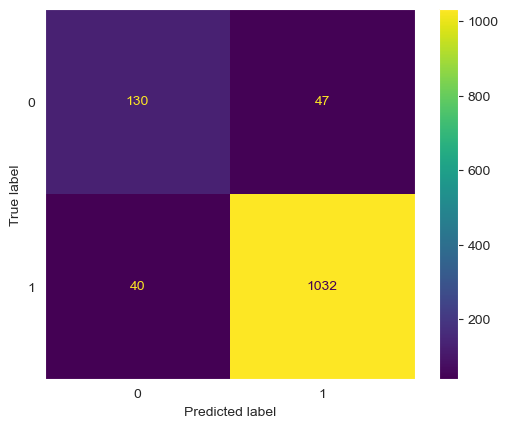

In [80]:
plot_confusion_matrix(grid,X_test_scaled,y_test);

In [81]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       177
           1       0.96      0.96      0.96      1072

    accuracy                           0.93      1249
   macro avg       0.86      0.85      0.85      1249
weighted avg       0.93      0.93      0.93      1249



In [82]:
svm_ac=grid.score(X_test_scaled,y_test)
svm_ac

0.9303442754203363

**Third Model: Decision Tree**

In [83]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(12,8))
# plot_tree(model);
# plt.show()

In [84]:
from sklearn.tree import DecisionTreeClassifier
param_grid={"max_depth":range(1,7)}

In [85]:
from sklearn.model_selection import GridSearchCV
grid_dtc=GridSearchCV(DecisionTreeClassifier(random_state=0,class_weight='balanced'),param_grid=param_grid,cv=10,return_train_score=True)

In [86]:
grid_dtc.fit(X_train_scaled,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': range(1, 7)}, return_train_score=True)

In [87]:
grid_dtc.best_params_

{'max_depth': 6}

In [88]:
grid_dtc_pred =grid_dtc.predict(X_test_scaled)

In [89]:
confusion_matrix(y_test,grid_dtc_pred)

array([[ 142,   35],
       [   6, 1066]], dtype=int64)

In [90]:
print(classification_report(y_test,grid_dtc_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       177
           1       0.97      0.99      0.98      1072

    accuracy                           0.97      1249
   macro avg       0.96      0.90      0.93      1249
weighted avg       0.97      0.97      0.97      1249



In [91]:
# grid_dt.best_score_

In [92]:
dtc_ac=grid_dtc.score(X_test_scaled,y_test)
dtc_ac

0.967173738991193

**Fourth Model: Random Forest**

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
n_estimators=[64,100,128,200]
max_features= [2,4,6,8,10,11]
bootstrap = [True,False]
oob_score = [True,False]

In [95]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [96]:
rfc = RandomForestClassifier(class_weight='balanced')
grid_rfc = GridSearchCV(rfc,param_grid)

In [97]:
grid_rfc.fit(X_train_scaled,y_train)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFa

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 4, 6, 8, 10, 11],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [98]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 6, 'n_estimators': 100, 'oob_score': True}

In [99]:
grid_rfc_pred =grid_rfc.predict(X_test_scaled)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


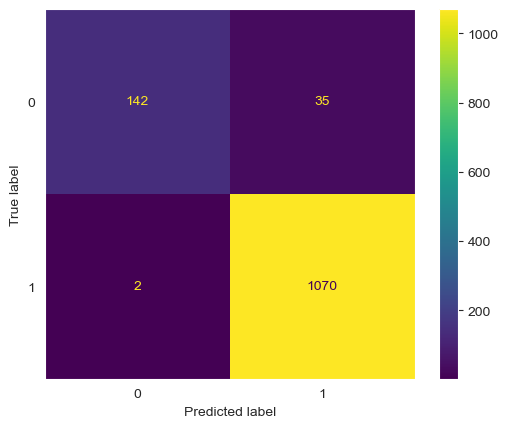

In [100]:
plot_confusion_matrix(grid_rfc,X_test_scaled,y_test)

In [101]:
print(classification_report(y_test,grid_rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88       177
           1       0.97      1.00      0.98      1072

    accuracy                           0.97      1249
   macro avg       0.98      0.90      0.93      1249
weighted avg       0.97      0.97      0.97      1249



In [102]:
# grid_rfc.best_score_

In [103]:
rfc_ac=grid_rfc.score(X_test_scaled,y_test)
rfc_ac

0.9703763010408326

**Gradient Boosting Classifier**

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
param_grid={"n_estimators":[1,5,10,20,40,100,200],'max_depth':[3,4,5,6,10,12]}

In [106]:
gb_model = GradientBoostingClassifier()

In [107]:
grid_gb = GridSearchCV(gb_model,param_grid)

In [108]:
grid_gb.fit(X_train_scaled,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 10, 12],
                         'n_estimators': [1, 5, 10, 20, 40, 100, 200]})

In [109]:
grid_gb.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [110]:
predictions = grid_gb.predict(X_test_scaled)

In [111]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       177
           1       0.97      1.00      0.98      1072

    accuracy                           0.97      1249
   macro avg       0.97      0.90      0.93      1249
weighted avg       0.97      0.97      0.97      1249



In [112]:
gb_ac=grid_gb.score(X_test_scaled,y_test)
gb_ac

0.9703763010408326

In [113]:
grid_gb.best_estimator_.feature_importances_

array([0.02494024, 0.06908179, 0.07095771, 0.03509861, 0.06852433,
       0.07348756, 0.06107669, 0.1042711 , 0.02848899, 0.01994572,
       0.44412726])

In [114]:
feat_import = grid_gb.best_estimator_.feature_importances_

In [115]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [116]:
imp_feats

,Importance
account_length,0.024940
intl_plan,0.069082
voice_mail_plan,0.070958
number_vmail_messages,0.035099
total_intl_minutes,0.068524
total_intl_calls,0.073488
total_intl_charge,0.061077
number_customer_service_calls,0.104271
total_net_minutes,0.028489
total_net_calls,0.019946


In [117]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
total_net_charge,0.444127
number_customer_service_calls,0.104271
total_intl_calls,0.073488
voice_mail_plan,0.070958
intl_plan,0.069082
total_intl_minutes,0.068524
total_intl_charge,0.061077
number_vmail_messages,0.035099
total_net_minutes,0.028489
account_length,0.024940


In [118]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,11.0,0.090909,0.119962,0.019946,0.031794,0.068524,0.072223,0.444127


In [119]:
imp_feats.sort_values('Importance')

,Importance
total_net_calls,0.019946
account_length,0.024940
total_net_minutes,0.028489
number_vmail_messages,0.035099
total_intl_charge,0.061077
total_intl_minutes,0.068524
intl_plan,0.069082
voice_mail_plan,0.070958
total_intl_calls,0.073488
number_customer_service_calls,0.104271


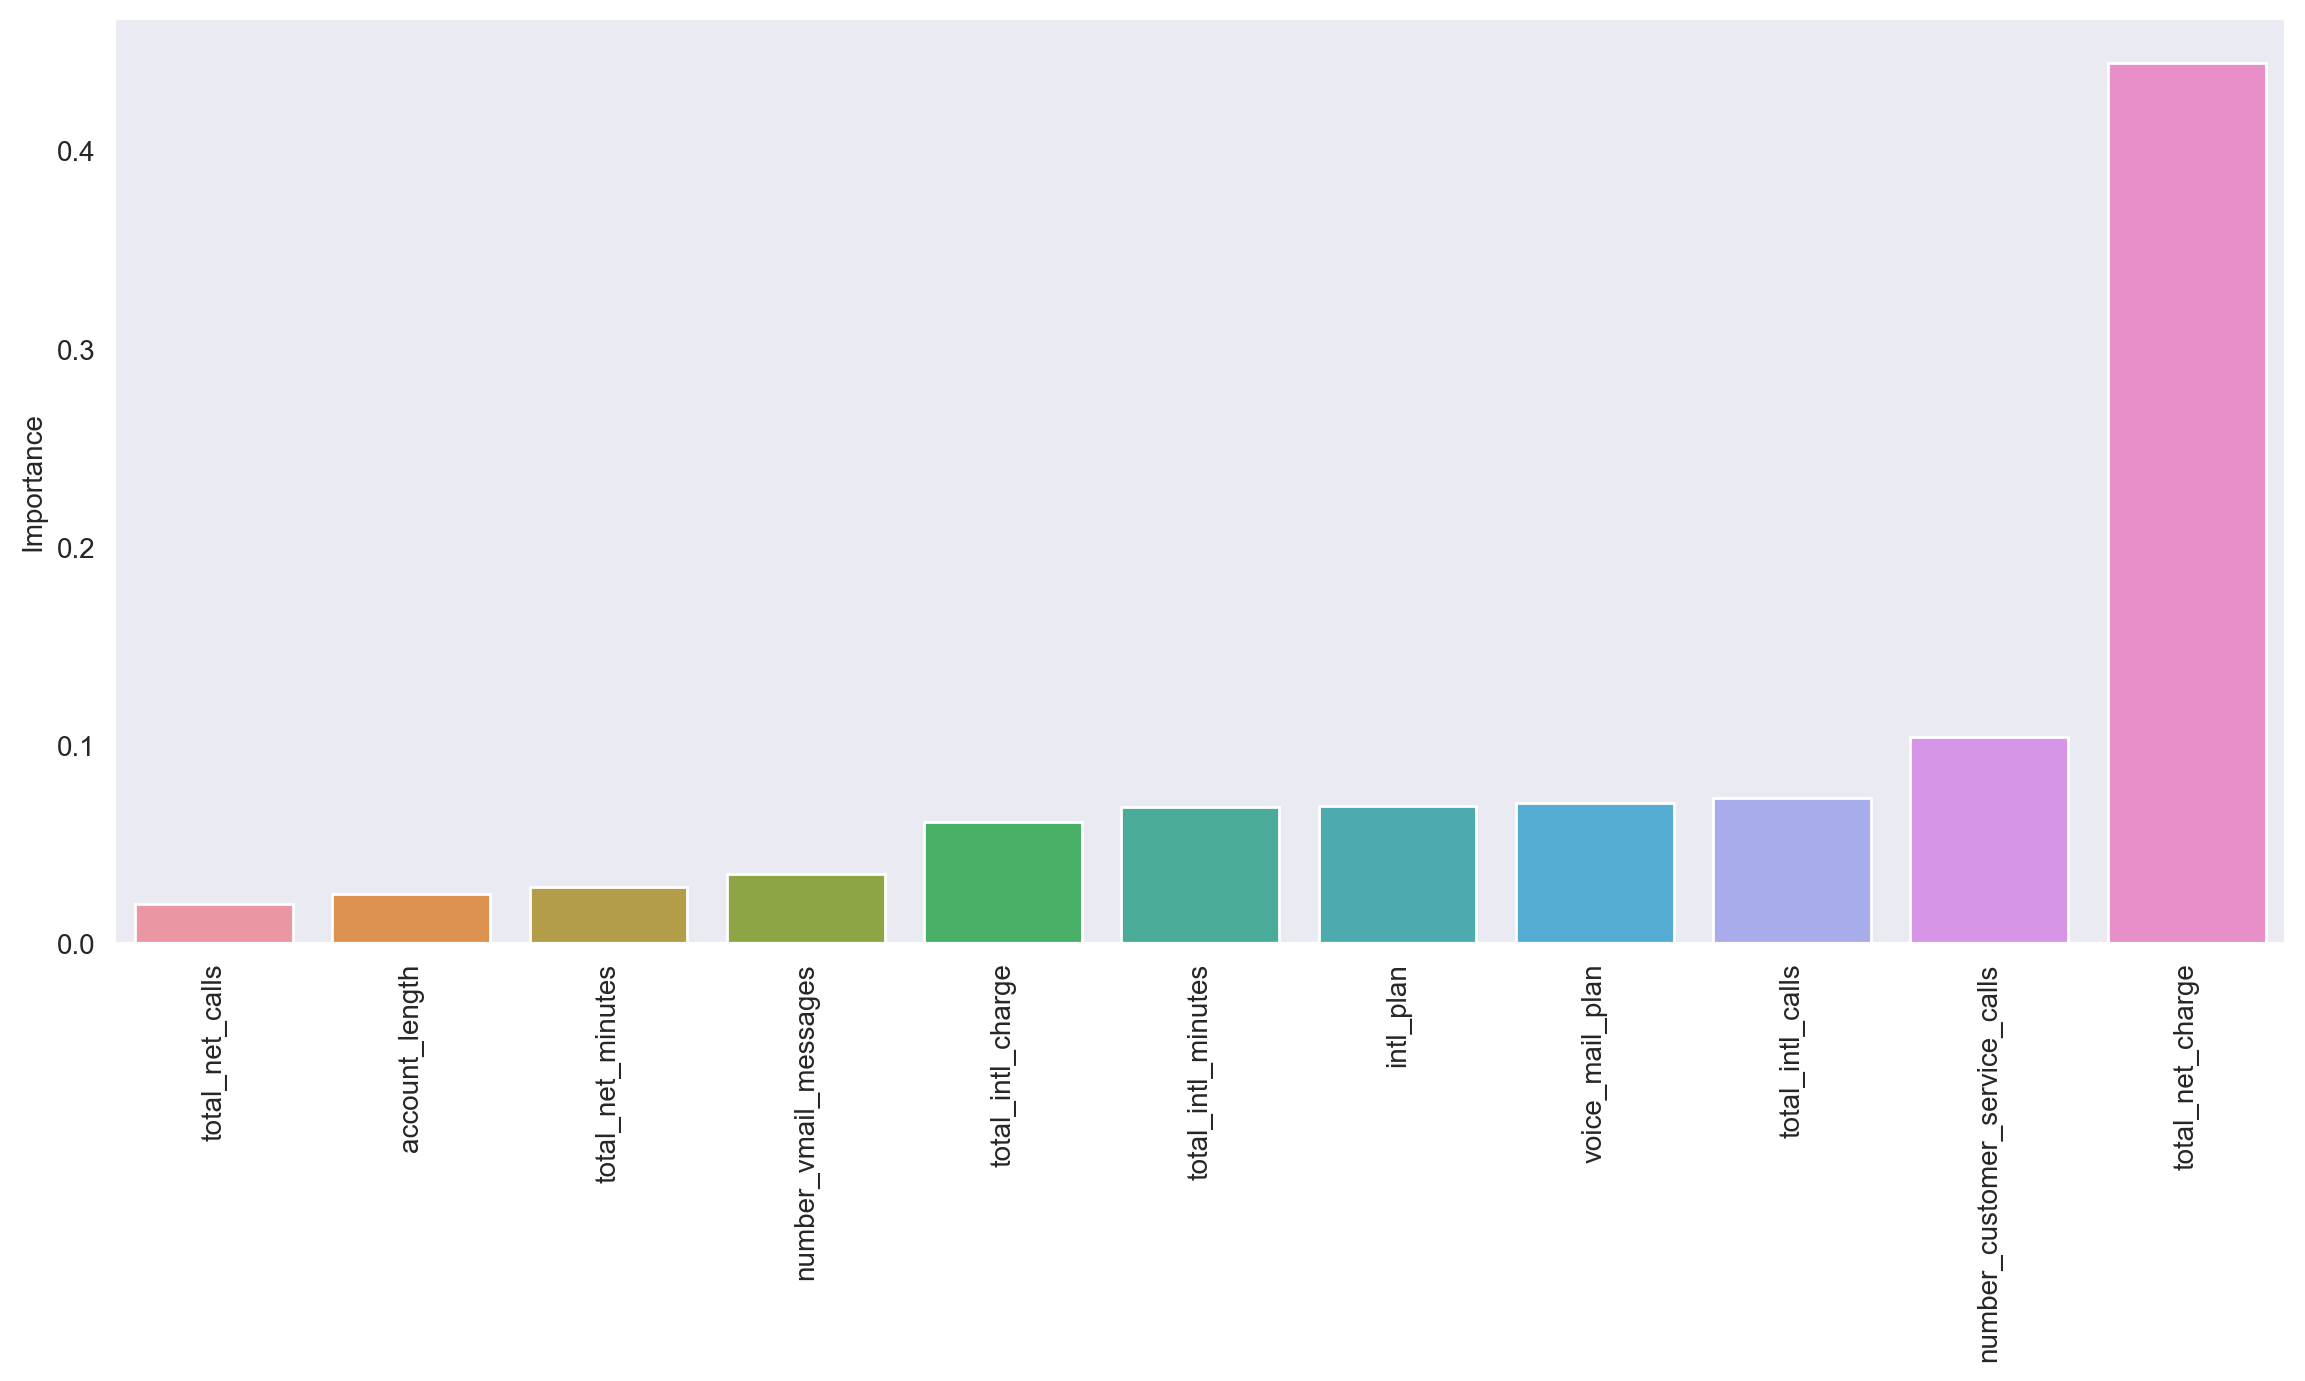

In [120]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

**Model Selection**

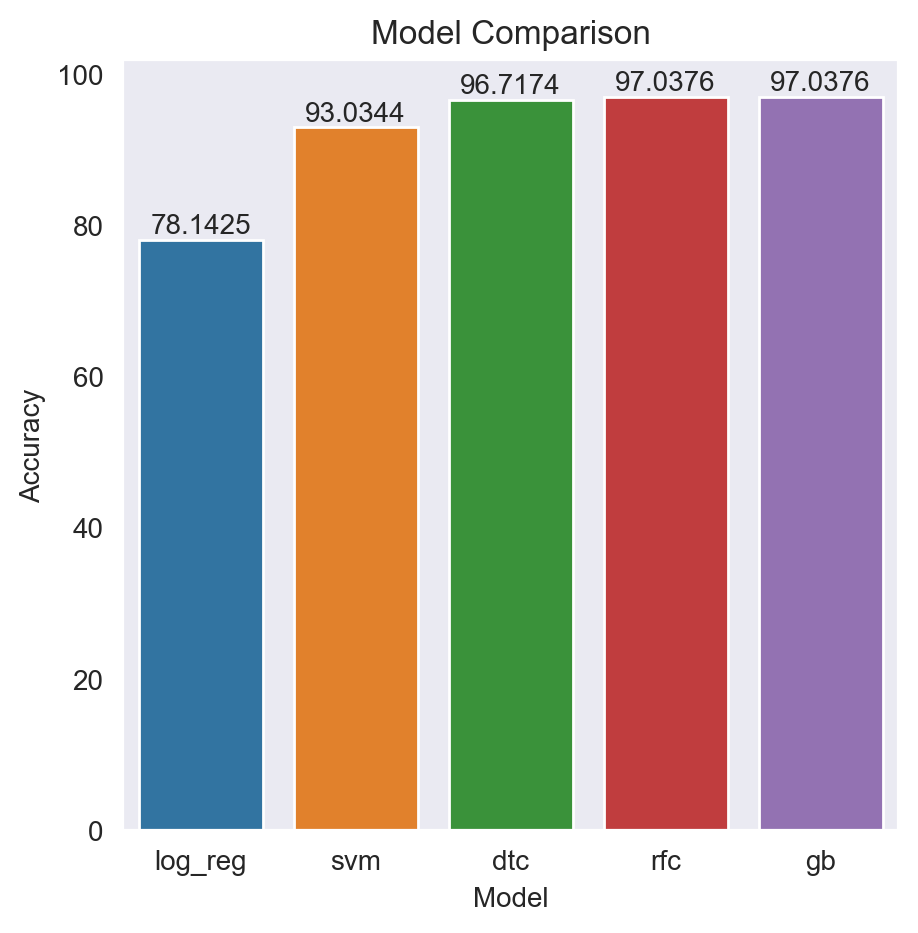

In [121]:
best_model={'log_reg':lr_ac*100,
           'svm':svm_ac*100,
           'dtc':dtc_ac*100,
           'rfc':rfc_ac*100,
           'gb':gb_ac*100}

my_df = pd.DataFrame(best_model.items(),columns=['Model','Accuracy'])
plt.figure(figsize=(5,5),dpi=200)
ax = sns.barplot(x='Model', y='Accuracy', data=my_df)
ax.set(title='Model Comparison');
# for i in ax.containers:
#     ax.bar_label(i,)
ax.bar_label(ax.containers[0]);

Decision tree, random forest and gradient boosting models provided similar testing accuracy. But for Gradient boosting, the testing accuracy is slightly better.